In [ ]:
#  1. Import Libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

#  2. Load Dataset
true = pd.read_csv("/Users/mac/Downloads/archive (1)/Fake.csv")
fake = pd.read_csv("/Users/mac/Downloads/archive (1)/True.csv")

true['label'] = 1   # Real
fake['label'] = 0   # Fake

df = pd.concat([true, fake], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle

df.head()
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
              label
count  44898.000000
mean       0.522985
std        0.499477
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


In [16]:
#  3. Simple Text Cleaning 
df['text'] = df['title'] + " " + df['text']

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['text'] = df['text'].apply(clean_text)

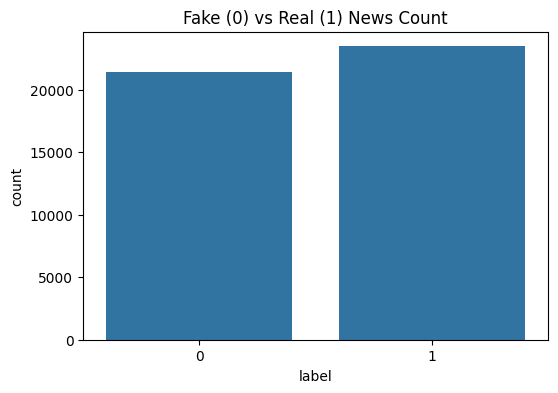

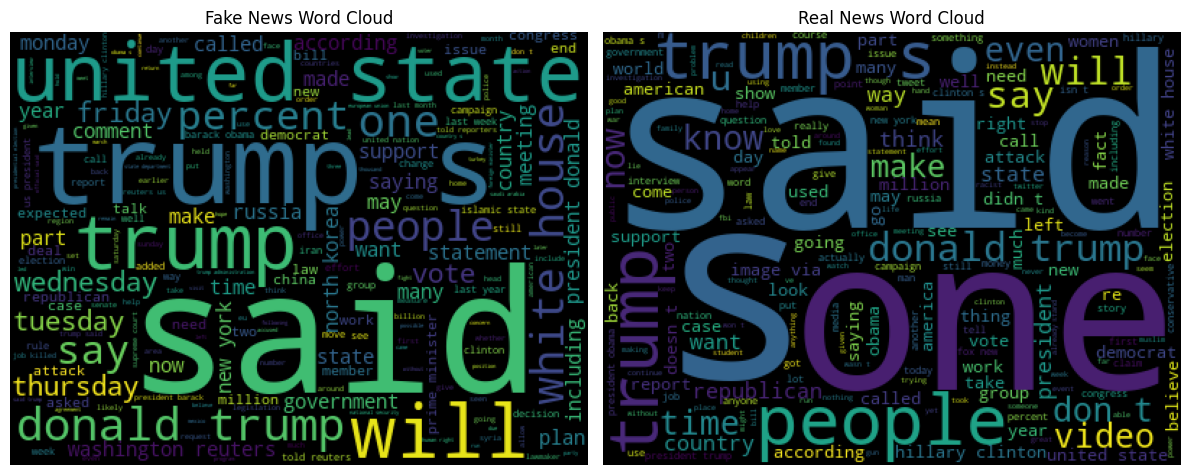

In [17]:
#  4. Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Fake (0) vs Real (1) News Count')
plt.show()

fake_words = " ".join(df[df.label==0]['text'])
real_words = " ".join(df[df.label==1]['text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300).generate(fake_words))
plt.axis('off')
plt.title("Fake News Word Cloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300).generate(real_words))
plt.axis('off')
plt.title("Real News Word Cloud")
plt.tight_layout()
plt.show()


In [ ]:
# 🧠5. Feature Extraction
X = df['text']
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

In [ ]:
#  6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [20]:
#  7. Train AI Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
# 8. Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9423162583518931

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4274
           1       0.95      0.94      0.94      4706

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



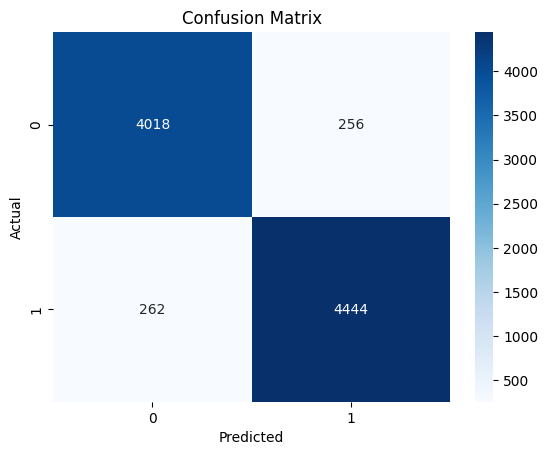

In [ ]:
# 9 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()